In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

In [82]:
raw_dataframe = pd.read_csv('electrode_dataset_raw-1.csv')
highest_values =list(raw_dataframe.max())
raw_dataframe

,elect_1,elect_2,elect_3,elect_4,elect_5,elect_6,elect_7,elect_8,elect_9,elect_10,...,elect_39,elect_40,elect_41,elect_42,elect_43,elect_44,elect_45,elect_46,finger,t_stamp
0,0.948983,1.643683,0.787927,0.603904,0.797991,0.822429,1.115476,0.299748,0.837032,0.649589,...,1.280449,0.268874,0.462822,0.854106,1.093031,0.721913,0.842296,0.943233,0,0
1,1.034717,1.568914,0.756739,0.734483,0.677319,0.792549,1.233032,0.248348,0.819631,0.658199,...,1.143735,0.194490,0.383131,0.890399,1.084566,0.693153,0.789014,0.893662,0,1
2,0.969300,1.386445,0.595216,0.704579,0.590323,0.884623,1.360769,0.302495,0.916835,0.588280,...,1.089831,0.170139,0.348483,0.949294,0.990095,0.665927,0.706562,0.810786,0,2
3,0.818372,1.744365,0.847349,1.248161,1.385567,1.376613,1.672392,0.571660,1.558864,1.478702,...,1.344509,0.513043,0.527267,0.562175,0.833659,0.718079,0.781624,0.867715,0,3
4,0.553802,1.252832,0.849976,1.472439,0.950234,0.995112,1.365694,0.681131,0.606322,0.853085,...,1.526924,0.810915,0.716100,1.024107,2.003204,1.341600,1.387954,1.331664,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.631722,1.355134,1.211104,1.173402,0.333543,0.847793,1.169657,0.423737,0.674125,1.782640,...,0.376967,1.129134,1.181424,2.063534,1.320236,0.373339,0.274859,0.218263,0,10995
10996,0.779301,1.473091,1.352929,1.285375,0.514552,1.083365,1.303960,0.610505,0.983138,1.969438,...,0.523056,1.298585,1.323135,2.296887,1.322268,0.324255,0.277582,0.235303,0,10996
10997,1.140769,1.764069,1.213073,1.609995,0.501221,0.865166,0.960485,0.588532,1.400457,2.115015,...,0.482041,1.182838,1.164100,0.874481,1.520691,0.454635,0.424205,0.433198,0,10997
10998,1.092543,1.946808,1.271511,2.135967,0.474912,0.662949,0.457749,0.468859,1.196748,1.691850,...,0.447668,0.754543,0.796830,1.226899,1.241679,0.673213,0.375590,0.345288,0,10998


In [83]:
correlation_matrix = raw_dataframe.corr()

correlation_matrix = correlation_matrix.iloc[:-2, :-2]

high_correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.95:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            high_correlation_pairs.append(pair)

print(len(high_correlation_pairs))

25


In [84]:
correlation_count = 0

for i in range(len(correlation_matrix.columns)):
    column = correlation_matrix.columns[i]
    mask = correlation_matrix.index != column
    if (correlation_matrix.loc[mask, column] > 0.90).any():
        correlation_count += 1
        
correlation_count


17

In [85]:
# Check for missing data
missing_data = raw_dataframe.isnull().sum()

# Display columns with missing values
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [86]:
duplicated_rows = raw_dataframe.duplicated()
number_of_duplicated_rows = duplicated_rows.sum()
number_of_duplicated_rows

0

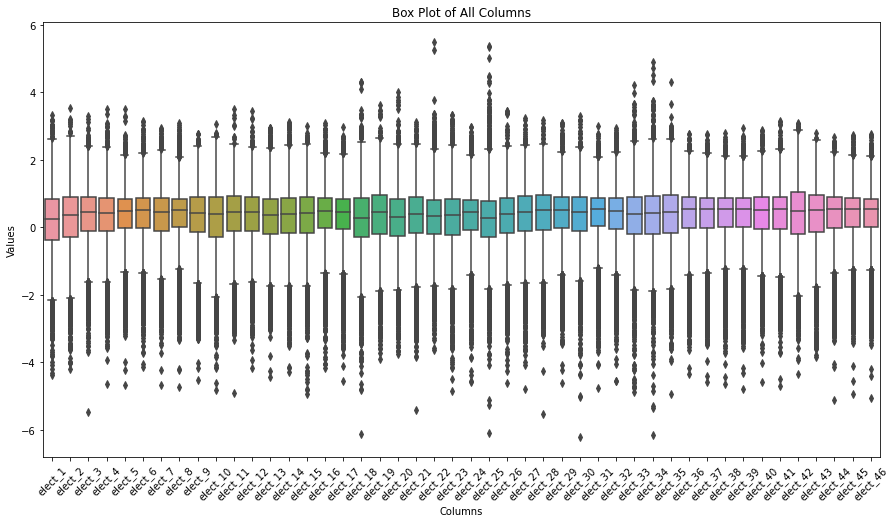

In [87]:
columns_to_plot = raw_dataframe.iloc[:, :-2]
plt.figure(figsize=(15, 8))
sns.boxplot(data=columns_to_plot)
plt.title('Box Plot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

<ipython-input-88-b9418e2e93d9>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


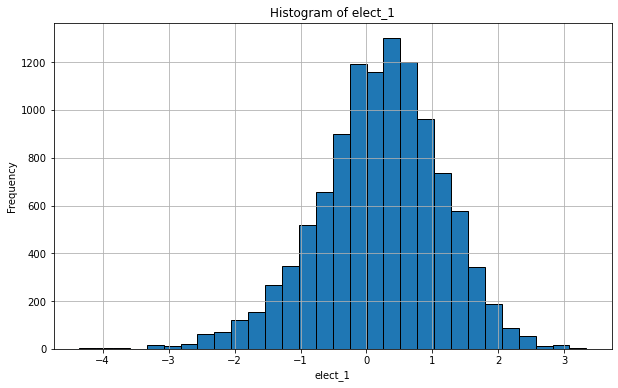

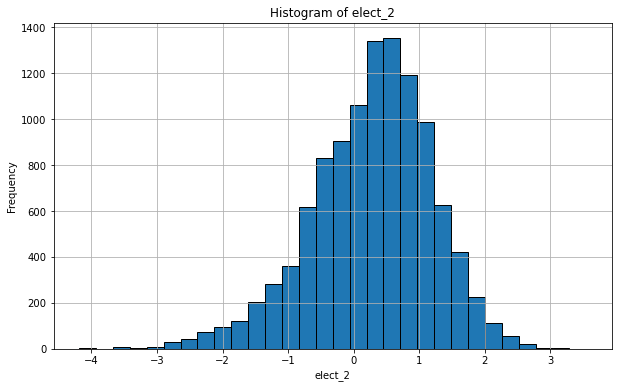

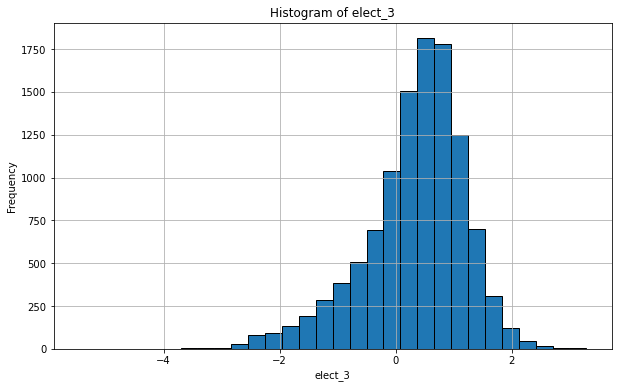

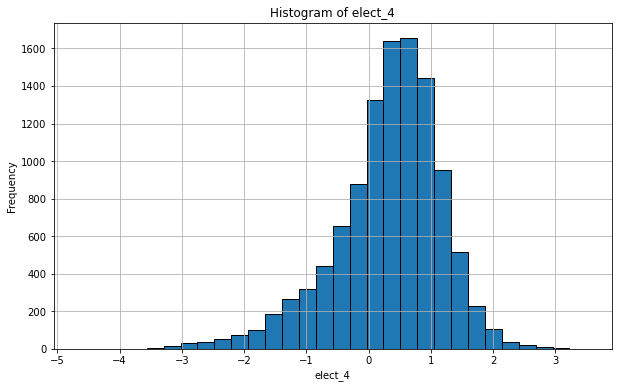

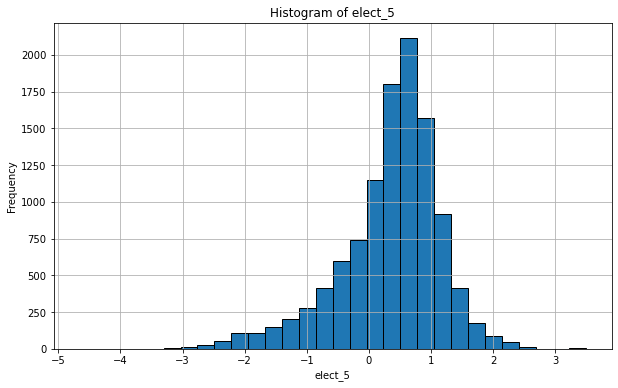

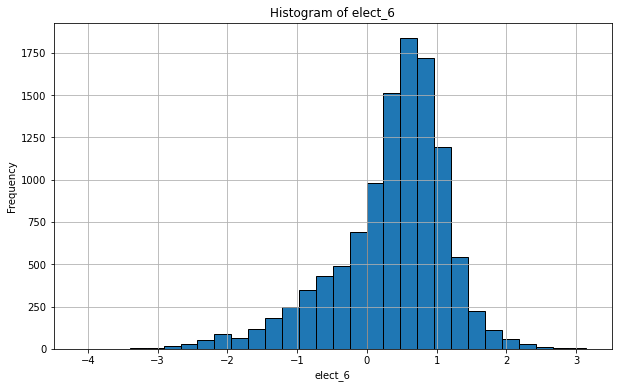

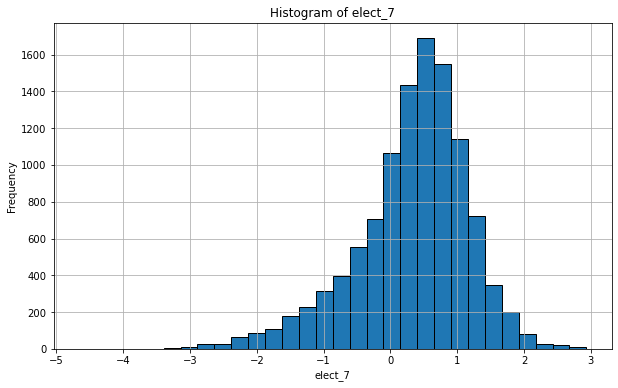

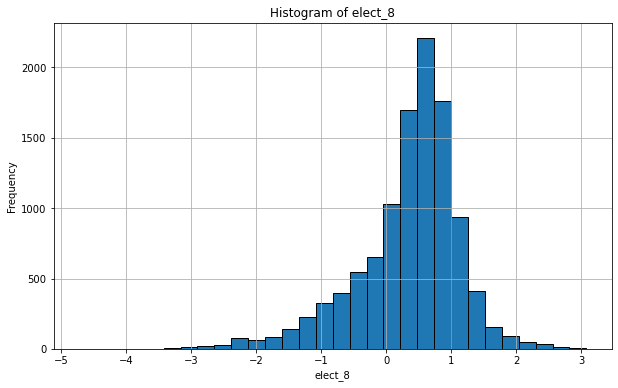

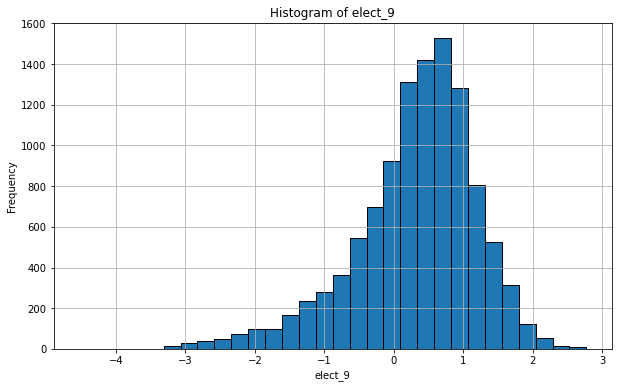

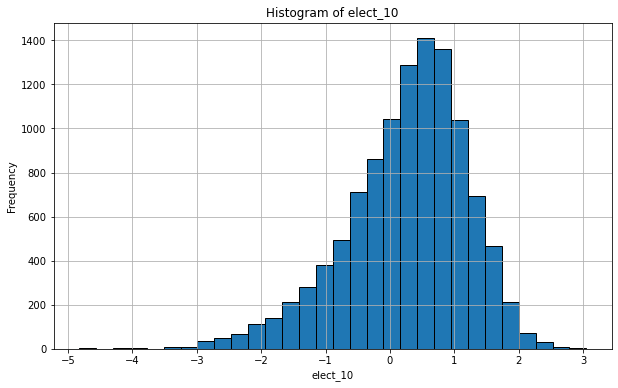

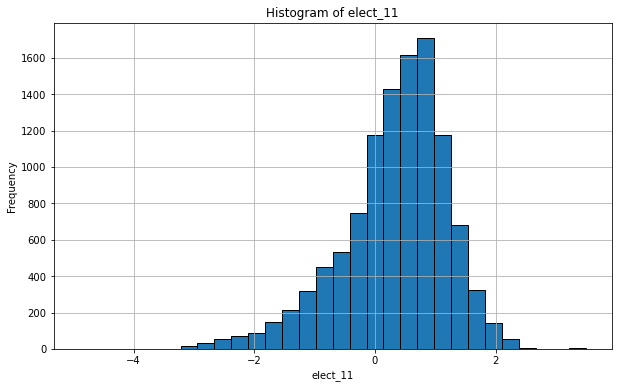

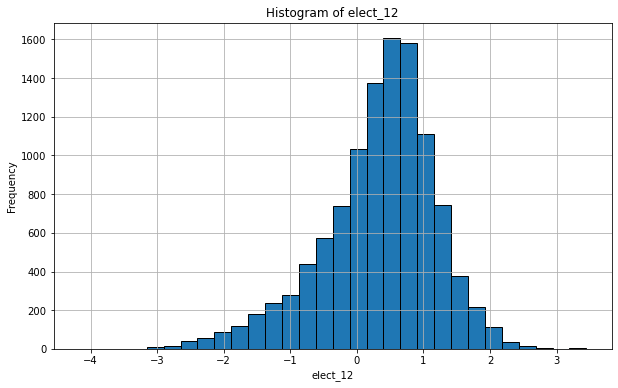

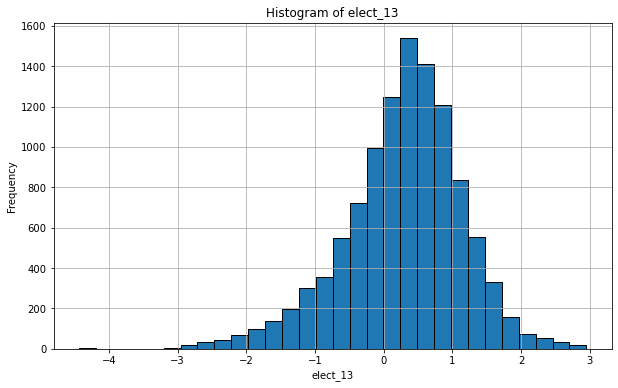

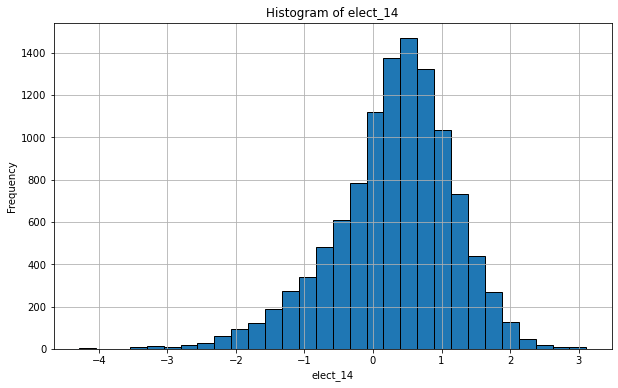

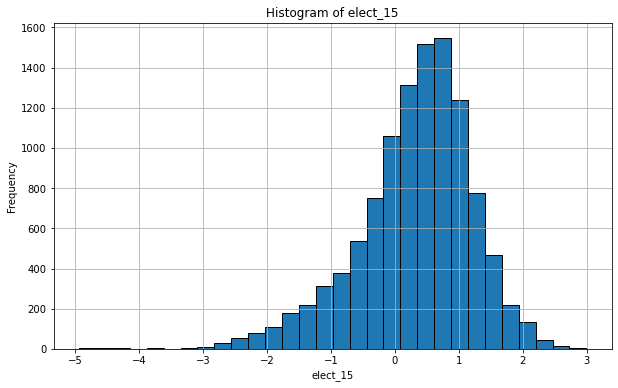

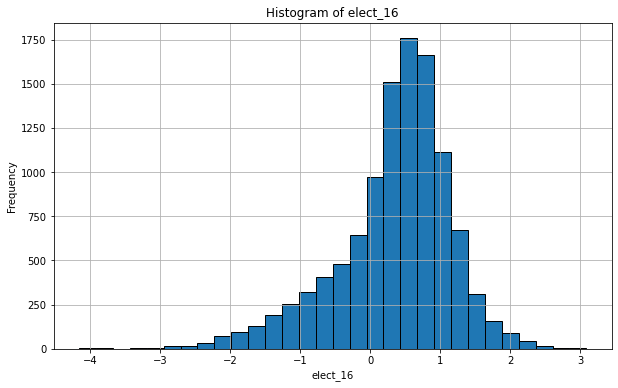

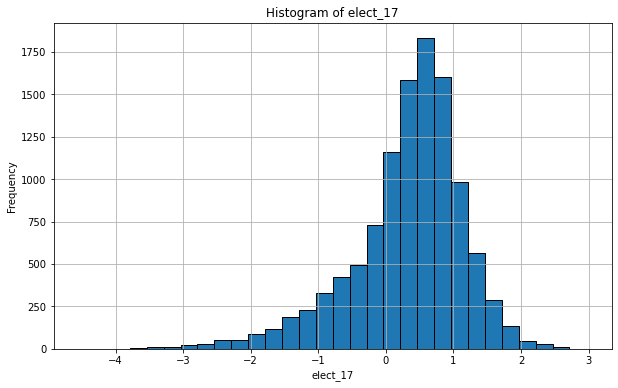

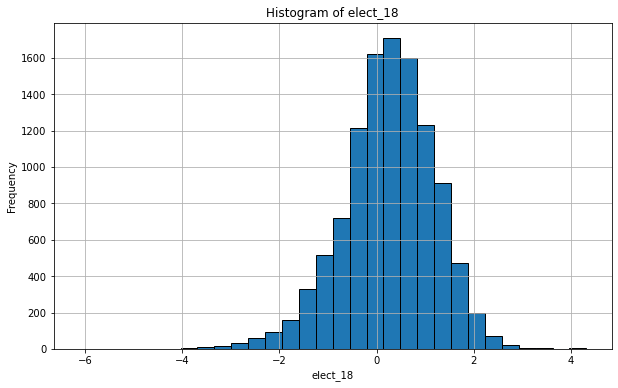

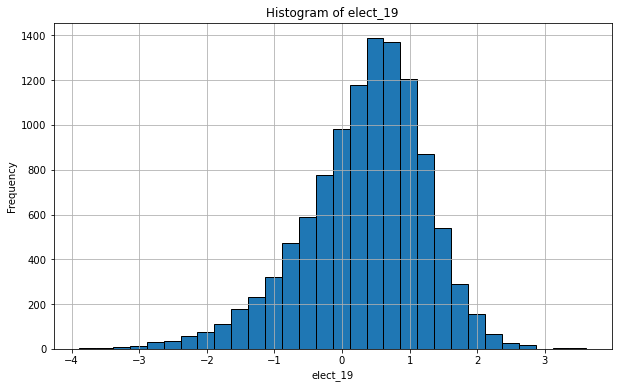

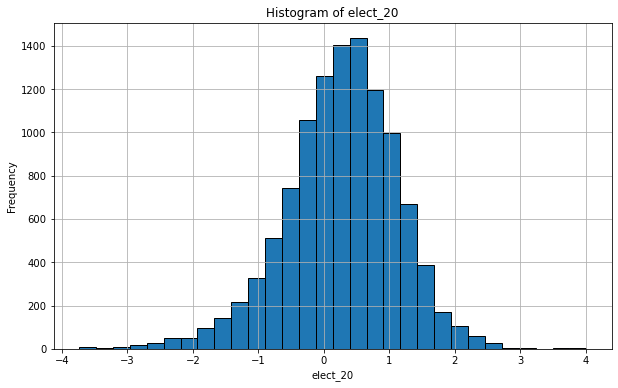

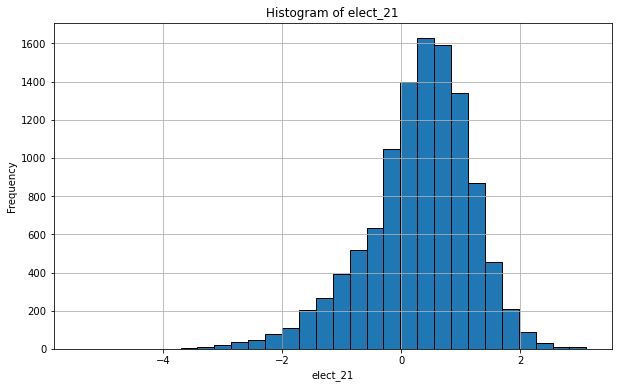

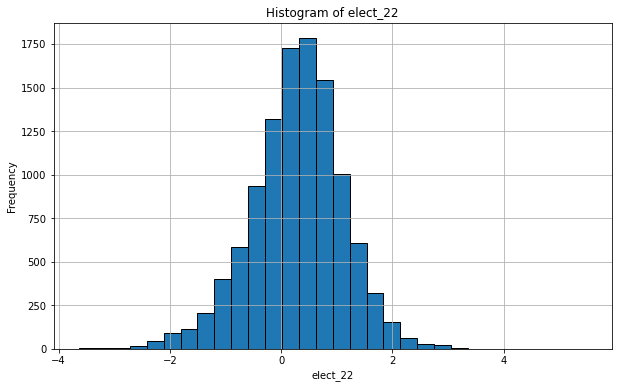

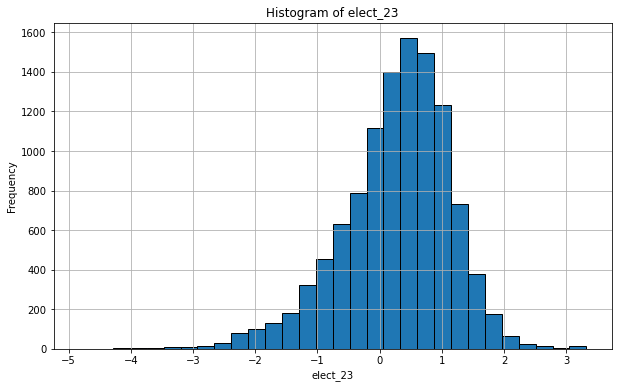

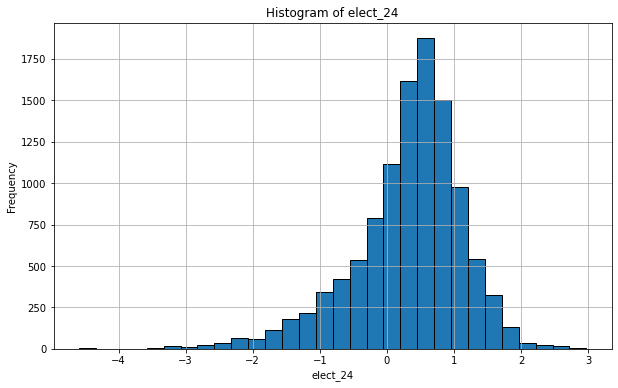

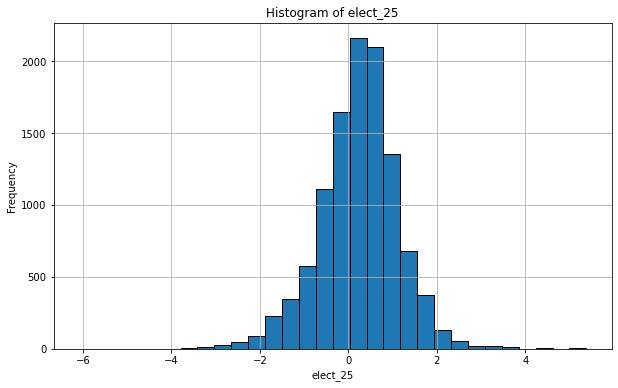

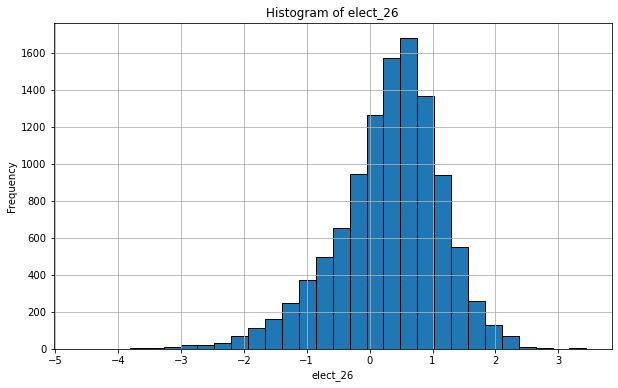

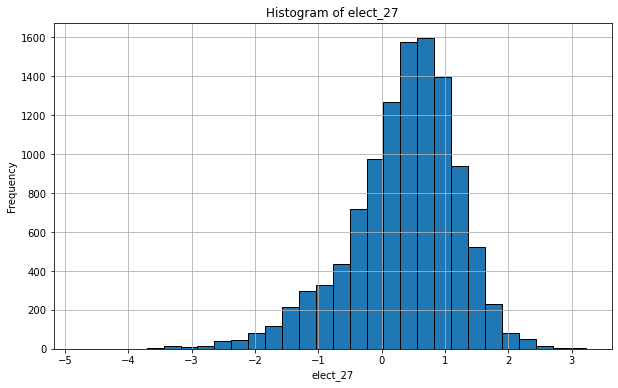

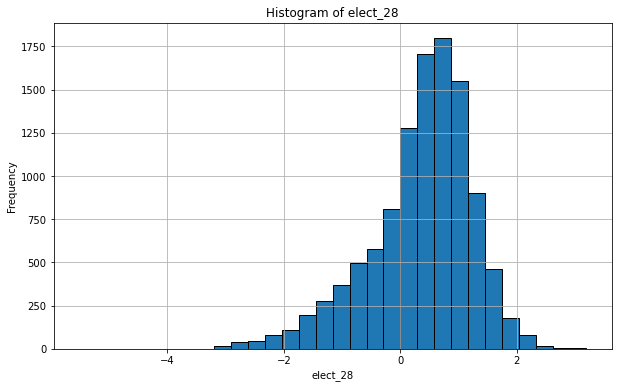

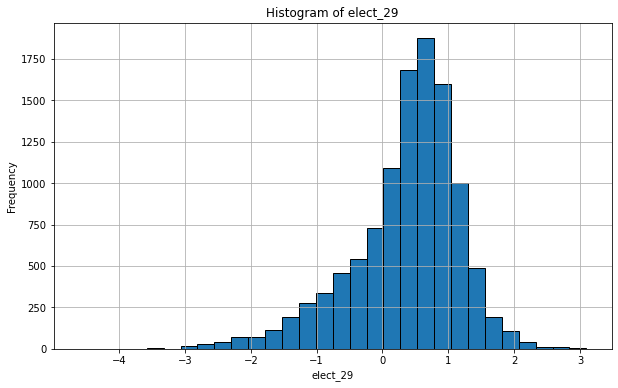

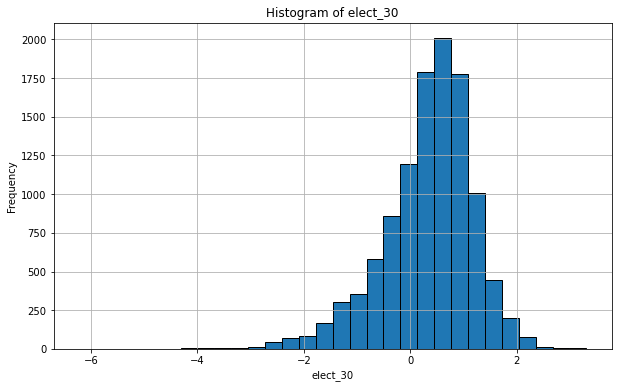

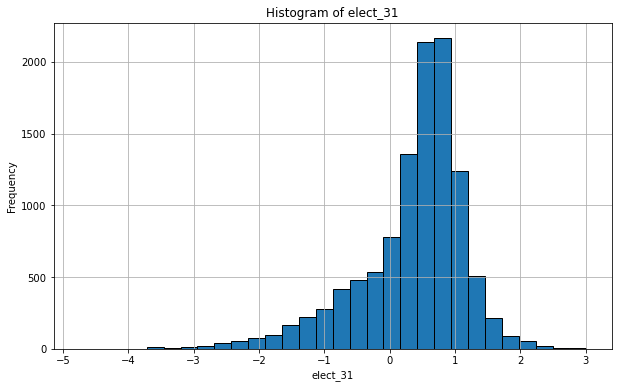

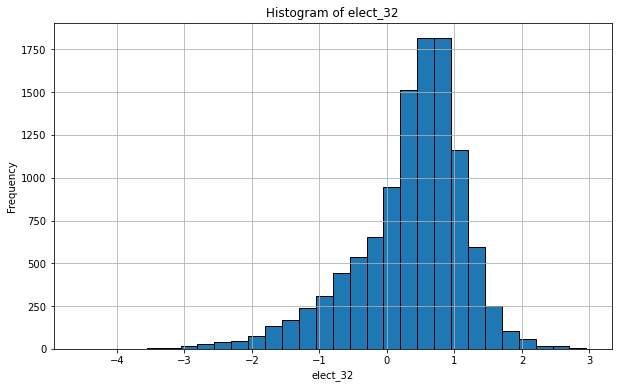

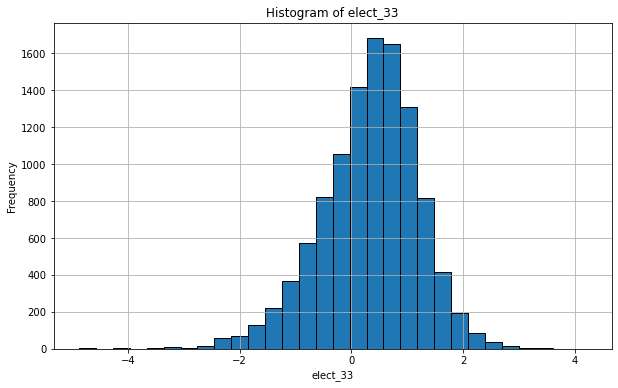

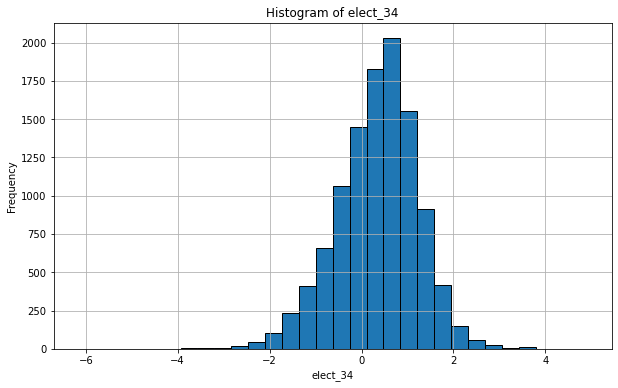

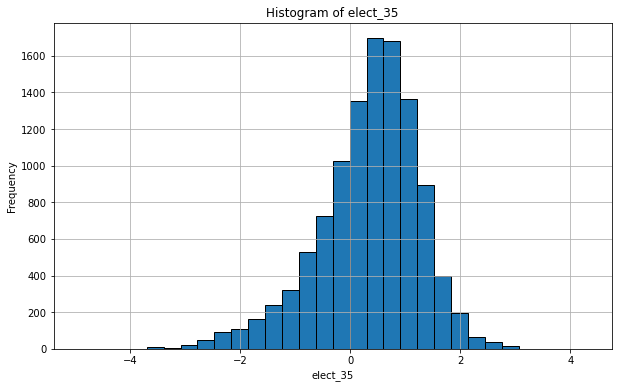

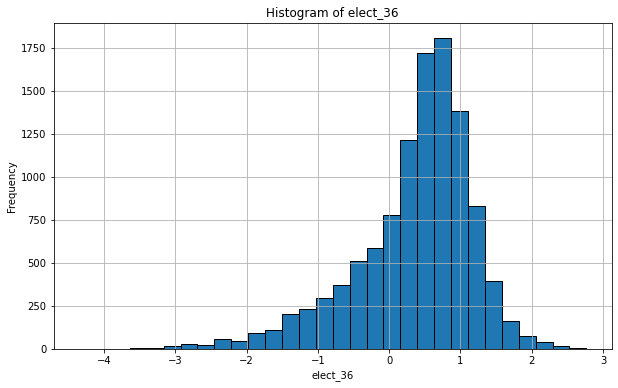

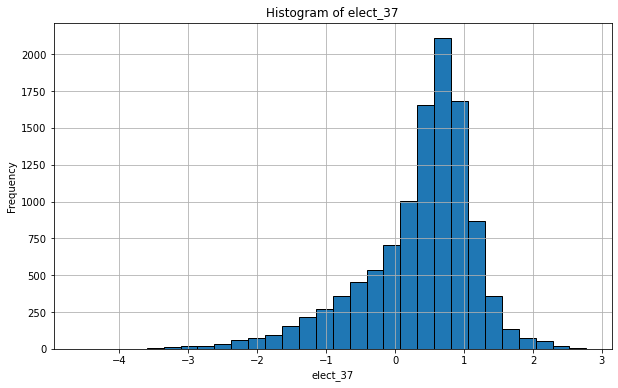

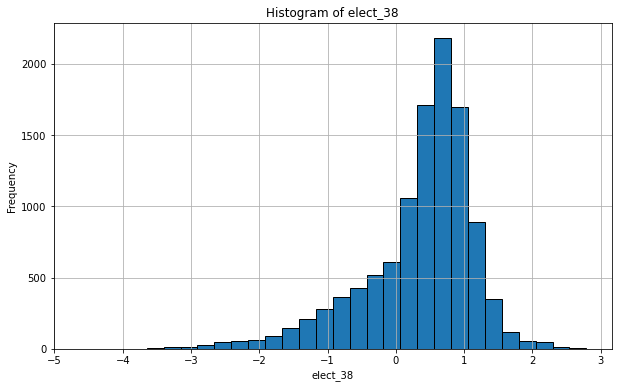

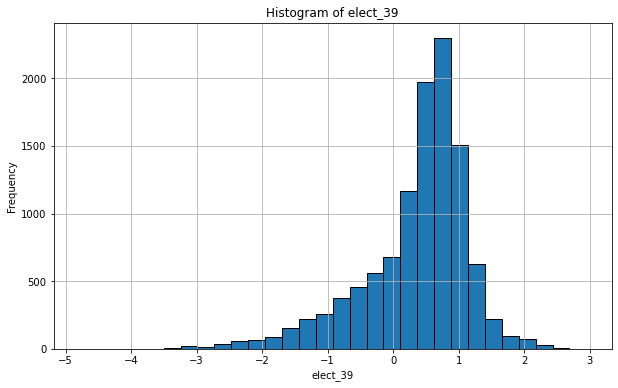

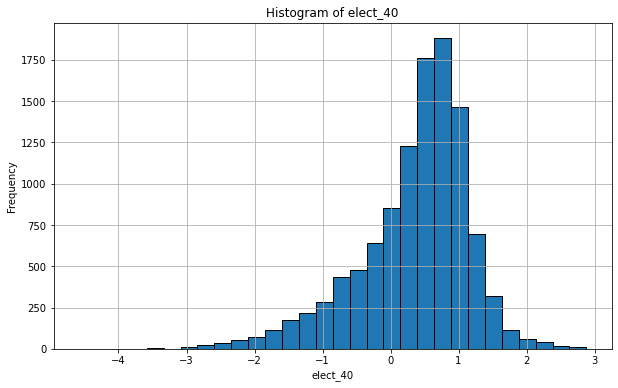

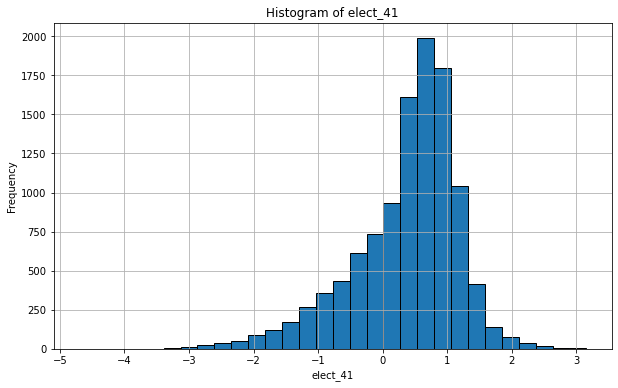

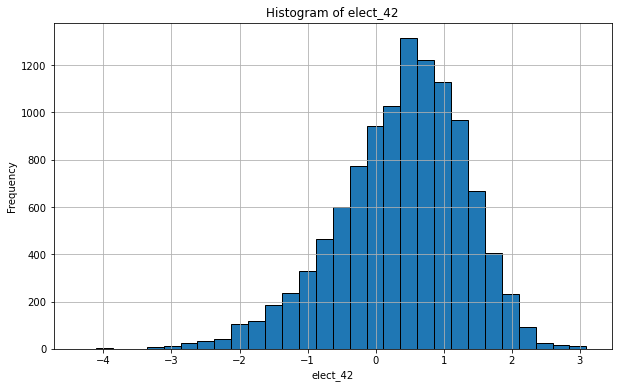

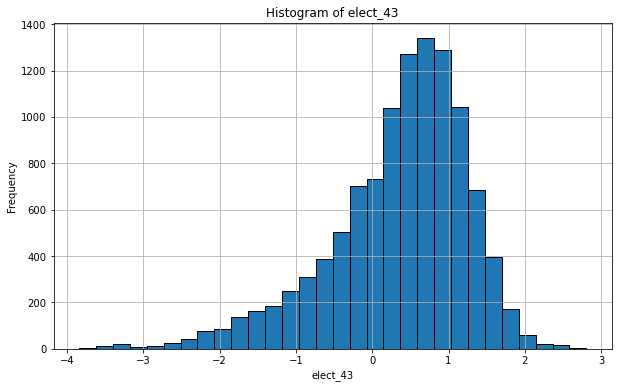

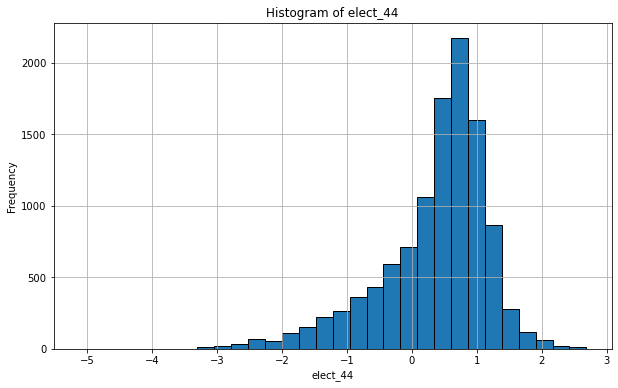

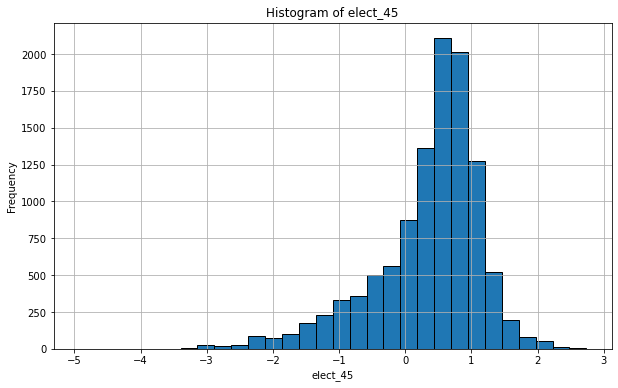

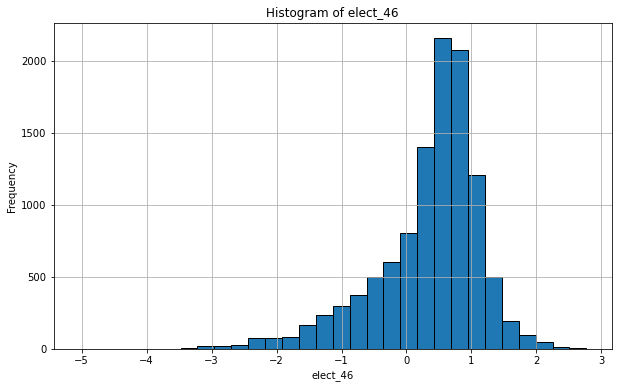

In [88]:
num_bins = 30

for column in columns_to_plot.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(columns_to_plot[column], bins=num_bins, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.show() #Uncomment to show histograms

In [89]:
data_to_scale = raw_dataframe.iloc[:, :-2]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)

pca = PCA()
pca.fit(scaled_data)
cumulative_variance = pca.explained_variance_ratio_.cumsum()

num_components = next(i for i, cumulative_var in enumerate(cumulative_variance) if cumulative_var >= 0.90) + 1

# Print the result
print(f'Number of principal components required to capture at least 90% of the variance: {num_components}')

Number of principal components required to capture at least 90% of the variance: 12


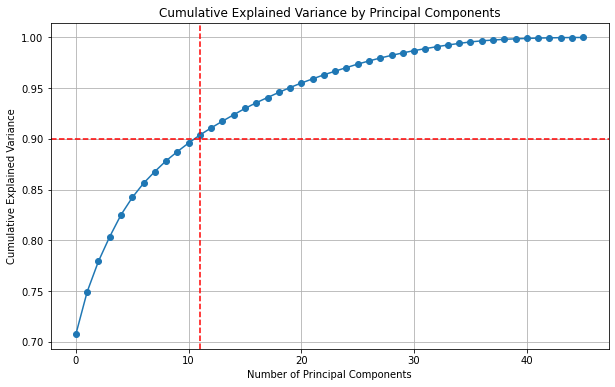

In [90]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axvline(x=num_components - 1, color='r', linestyle='--')
plt.grid()
plt.show()

In [91]:
variance_first_component = pca.explained_variance_ratio_[0]
variance_percentage = round(variance_first_component * 100)
variance_percentage

71

In [107]:
abs_loadings_pc1 = np.abs(pca.components_[0])
#find highest loading and corresponding index
most_important_feature_index_pc1 = abs_loadings_pc1.argmax()
most_important_feature_pc1 = raw_dataframe.columns[most_important_feature_index_pc1]
most_important_feature_value_pc1 = pca.components_[0][most_important_feature_index_pc1]

most_important_feature_pc1 = int(most_important_feature_pc1.split('_')[-1])

print(most_important_feature_pc1)
print(most_important_feature_value_pc1)

39
-0.17141748308381033


In [106]:
abs_loadings_pc2 = np.abs(pca.components_[1])


most_important_feature_index_pc2 = abs_loadings_pc2.argmax()
most_important_feature_pc2 = raw_dataframe.columns[most_important_feature_index_pc2]
most_important_feature_value_pc2 = pca.components_[1][most_important_feature_index_pc2]

# Extract the feature number from the label for PC2
most_important_feature_pc2 = int(most_important_feature_pc2.split('_')[-1])

# Print the most important feature for PC2
print(most_important_feature_pc2)
print(most_important_feature_value_pc2)

10
0.35347946249277384


In [94]:
abs_loadings_pc2

array([0.40116291, 0.38493821, 0.2249305 , 0.08656809, 0.0343304 ,
       0.04287133, 0.17703737, 0.02570607, 0.34952091, 0.41837911,
       0.16779135, 0.05371855, 0.01717645, 0.05165512, 0.10999645,
       0.01526664, 0.00840581, 0.0032699 , 0.03590781, 0.06294967,
       0.00228062, 0.04098116, 0.13168968, 0.05216494, 0.04590461,
       0.07100573, 0.08086512, 0.00990841, 0.08326577, 0.03845439,
       0.02196577, 0.10464886, 0.17478355, 0.1656607 , 0.12078936,
       0.11041705, 0.07979669, 0.05479046, 0.029029  , 0.12392732,
       0.11874062, 0.21521908, 0.11881831, 0.05780078, 0.05722788,
       0.04507318])

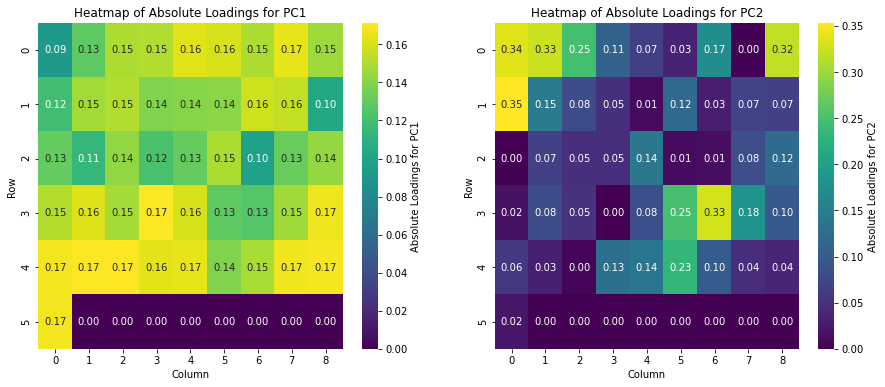

In [108]:
rows = 6
cols = 9

abs_loadings_pc1_2d = np.zeros((rows, cols))  
abs_loadings_pc1_2d.flat[:len(abs_loadings_pc1)] = abs_loadings_pc1  
abs_loadings_pc1_2d[rows-1, len(abs_loadings_pc1):] = np.nan  

abs_loadings_pc2_2d = np.zeros((rows, cols))  
abs_loadings_pc2_2d.flat[:len(abs_loadings_pc2)] = abs_loadings_pc2  
abs_loadings_pc2_2d[rows-1, len(abs_loadings_pc2):] = np.nan  

fig, axes = plt.subplots(1, 2, figsize=(15, 6))


sns.heatmap(abs_loadings_pc1_2d, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Absolute Loadings for PC1'}, ax=axes[0])
axes[0].set_xlabel('Column')
axes[0].set_ylabel('Row')
axes[0].set_title('Heatmap of Absolute Loadings for PC1')

sns.heatmap(abs_loadings_pc2_2d, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Absolute Loadings for PC2'}, ax=axes[1])
axes[1].set_xlabel('Column')
axes[1].set_ylabel('Row')
axes[1].set_title('Heatmap of Absolute Loadings for PC2')
plt.show()

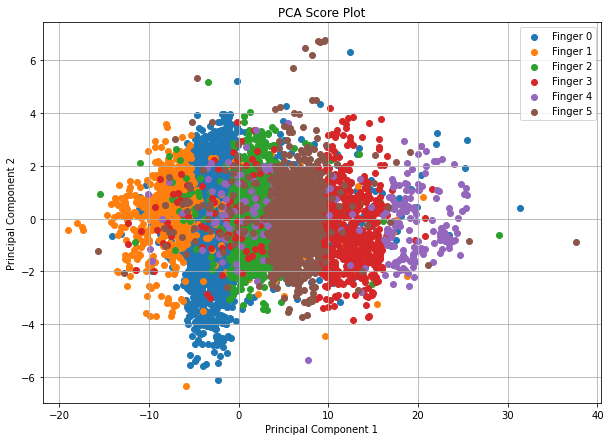

In [109]:
data = pd.read_csv('electrode_dataset_raw-1.csv')

electrode_columns = [f'elect_{i}' for i in range(1, 47)]
X = data[electrode_columns]
y = data['finger']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)


principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['finger'] = y

plt.figure(figsize=(10, 7))
for finger in np.unique(y):
    indices = principal_df['finger'] == finger
    plt.scatter(principal_df.loc[indices, 'PC1'], principal_df.loc[indices, 'PC2'], label=f'Finger {finger}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Score Plot')
plt.legend()
plt.grid()

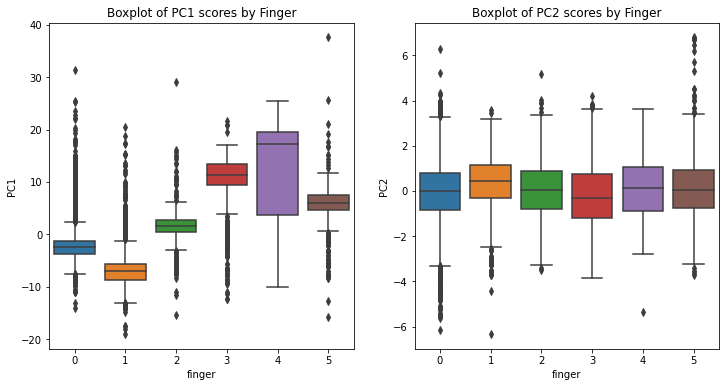

In [110]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='finger', y='PC1', data=principal_df)
plt.title('Boxplot of PC1 scores by Finger')

plt.subplot(1, 2, 2)
sns.boxplot(x='finger', y='PC2', data=principal_df)
plt.title('Boxplot of PC2 scores by Finger')

plt.show()

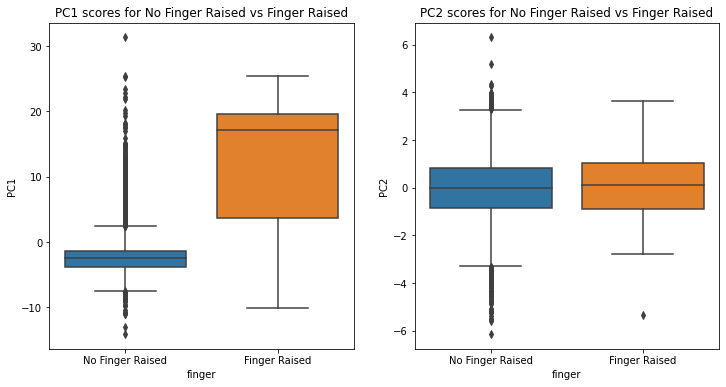

In [98]:
no_finger_raised = principal_df[principal_df['finger'] == 0]
ring_finger_raised = principal_df[principal_df['finger'] == 4]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='finger', y='PC1', data=principal_df[principal_df['finger'].isin([0, 4])])
plt.title('PC1 scores for No Finger Raised vs Finger Raised')
plt.xticks([0, 1], ['No Finger Raised', 'Finger Raised'])

plt.subplot(1, 2, 2)
sns.boxplot(x='finger', y='PC2', data=principal_df[principal_df['finger'].isin([0, 4])])
plt.title('PC2 scores for No Finger Raised vs Finger Raised')
plt.xticks([0, 1], ['No Finger Raised', 'Finger Raised'])

plt.show()


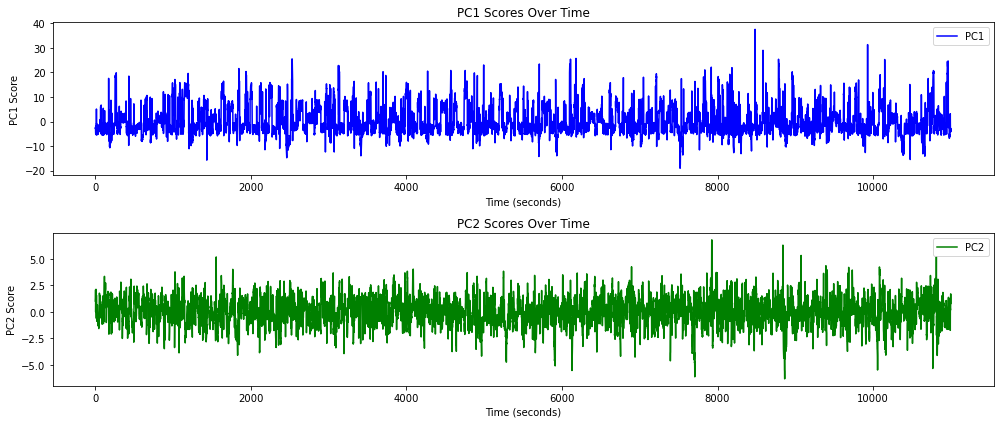

In [99]:
principal_df['t_stamp'] = data['t_stamp']

plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(principal_df['t_stamp'], principal_df['PC1'], label='PC1', color='blue')
plt.title('PC1 Scores Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('PC1 Score')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(principal_df['t_stamp'], principal_df['PC2'], label='PC2', color='green')
plt.title('PC2 Scores Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('PC2 Score')
plt.legend()

plt.tight_layout()
plt.show()



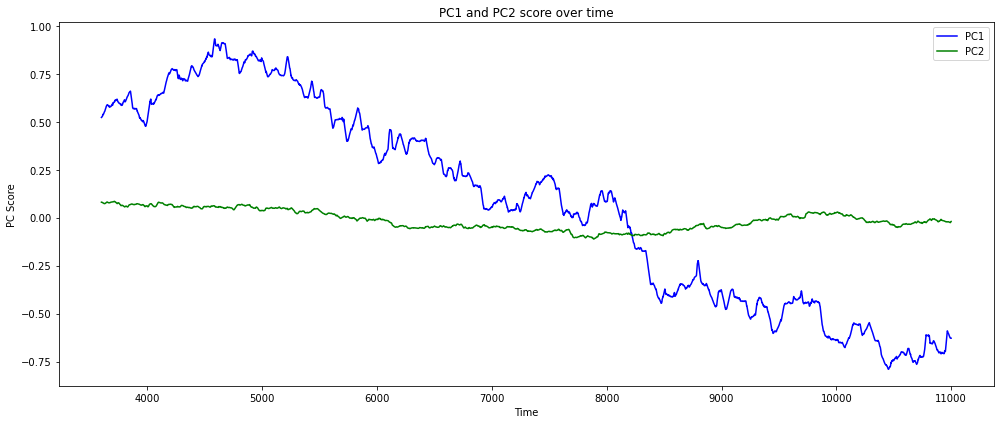

In [100]:
principal_df['t_stamp'] = data['t_stamp']

principal_df.set_index('t_stamp', inplace=True)

pc1_ma = principal_df['PC1'].rolling(window=3600).mean()
pc2_ma = principal_df['PC2'].rolling(window=3600).mean()

plt.figure(figsize=(14, 6))


plt.plot(pc1_ma, label='PC1' , color='blue')
plt.plot(pc2_ma, label='PC2', color='green')
plt.title('PC1 and PC2 score over time')
plt.xlabel('Time')
plt.ylabel('PC Score')
plt.legend()

plt.tight_layout()
plt.show()

In [101]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

loadings = pca.components_

loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=electrode_columns)

print("PC1 Loadings:\n", loadings_df['PC1'].sort_values(ascending=False))
print("PC2 Loadings:\n", loadings_df['PC2'].sort_values(ascending=False))

selected_electrodes = ['elect_43', 'elect_18', 'elect_15', 'elect_46', 'elect_36']
print("Selected Electrodes' Loadings on PC1 and PC2:")
print(loadings_df.loc[selected_electrodes])


PC1 Loadings:
 elect_1    -0.091781
elect_25   -0.099039
elect_18   -0.102684
elect_20   -0.114378
elect_10   -0.119005
elect_22   -0.122389
elect_34   -0.125657
elect_33   -0.128779
elect_2    -0.129106
elect_19   -0.130295
elect_23   -0.130942
elect_26   -0.131621
elect_42   -0.138768
elect_13   -0.139219
elect_14   -0.140193
elect_15   -0.141870
elect_21   -0.143217
elect_27   -0.143938
elect_9    -0.146414
elect_35   -0.146722
elect_11   -0.147726
elect_30   -0.148376
elect_43   -0.148759
elect_24   -0.149621
elect_7    -0.150322
elect_3    -0.150618
elect_12   -0.150850
elect_4    -0.150998
elect_28   -0.151523
elect_17   -0.155898
elect_16   -0.158371
elect_32   -0.160390
elect_6    -0.160671
elect_29   -0.162412
elect_5    -0.163131
elect_40   -0.163537
elect_41   -0.165010
elect_8    -0.165281
elect_36   -0.166912
elect_44   -0.167521
elect_46   -0.168221
elect_37   -0.168610
elect_45   -0.168859
elect_31   -0.170247
elect_38   -0.170320
elect_39   -0.171417
Name: PC1, dtype: f

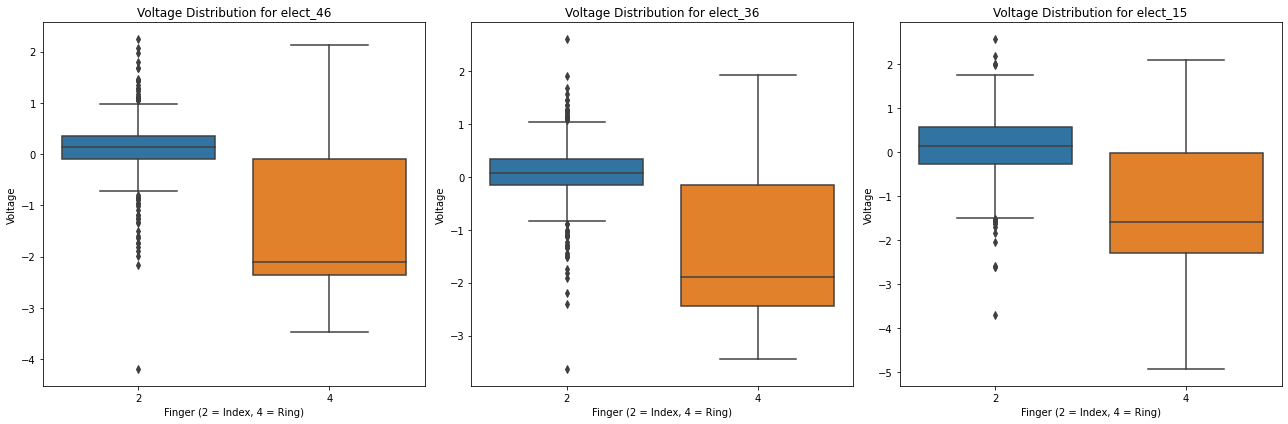

In [112]:
chosen_electrodes = ['elect_46', 'elect_36', 'elect_15']

df_chosen = data[chosen_electrodes + ['finger']]

df_filtered = df_chosen[df_chosen['finger'].isin([2, 4])]

plt.figure(figsize=(18, 6))
for i, electrode in enumerate(chosen_electrodes, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='finger', y=electrode, data=df_filtered)
    plt.title(f'Voltage Distribution for {electrode}')
    plt.xlabel('Finger (2 = Index, 4 = Ring)')
    plt.ylabel('Voltage')

plt.tight_layout()
plt.show()


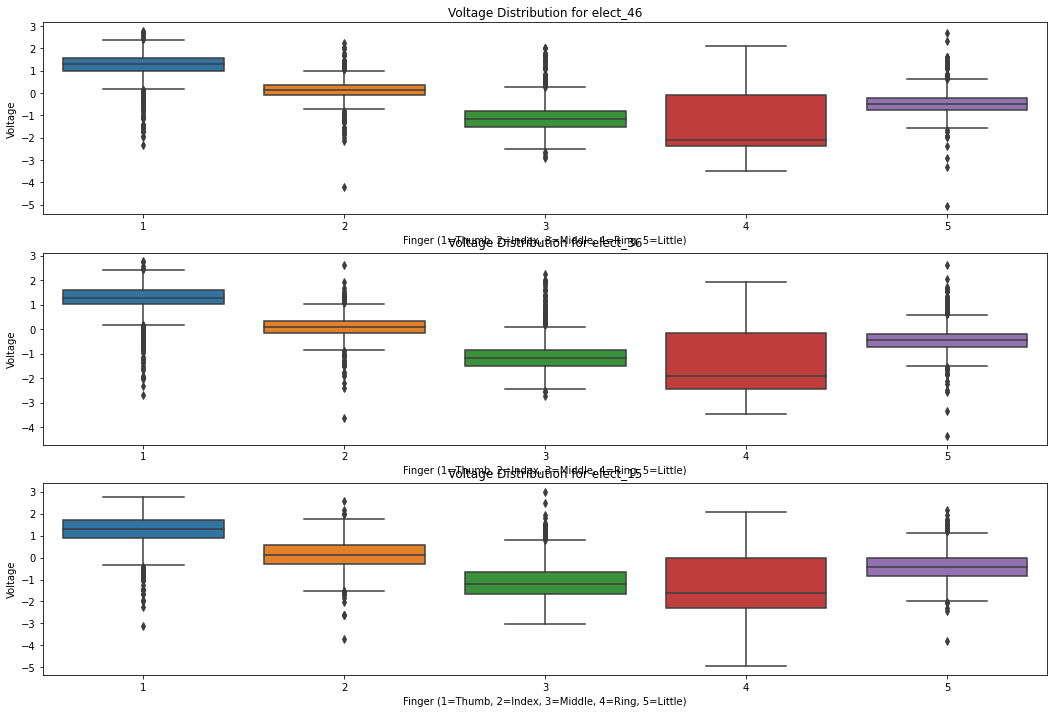

In [114]:
df_chosen = data[chosen_electrodes + ['finger']]

fingers = [1, 2, 3, 4, 5]
df_filtered = df_chosen[df_chosen['finger'].isin(fingers)]

plt.figure(figsize=(18, 12))

for i, electrode in enumerate(chosen_electrodes, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='finger', y=electrode, data=df_filtered)
    plt.title(f'Voltage Distribution for {electrode}')
    plt.xlabel('Finger (1=Thumb, 2=Index, 3=Middle, 4=Ring, 5=Little)')
    plt.ylabel('Voltage')

plt.show()
